Dataset:

https://github.com/amankharwal/Website-data/blob/master/database.csv

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load and read the dataset

In [2]:
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

Now let’s see the main characteristics of earthquake data and create an object of these characteristics, namely, date, time, latitude, longitude, depth, magnitude:

In [3]:
data = data[["Date","Time","Latitude", "Longitude", "Depth", "Magnitude"]]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


Since the data is random, so we need to scale it based on the model inputs. In this, we convert the given date and time to Unix time which is in seconds and a number

In [4]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'],data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except:
        timestamp.append('ValueError')
timestamp = pd.Series(timestamp)
data['Timestamp'] = timestamp.values
final_data = data.drop(['Date','Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157643142.0
1,1.863,127.352,80.0,5.8,-157478411.0
2,-20.579,-173.972,20.0,6.2,-157368242.0
3,-59.076,-23.557,15.0,5.8,-157106417.0
4,11.938,126.427,15.0,5.8,-157039030.0


### Data Visualization

Now, before we create the earthquake prediction model, let’s visualize the data on a world map that shows a clear representation of where the earthquake frequency will be more:

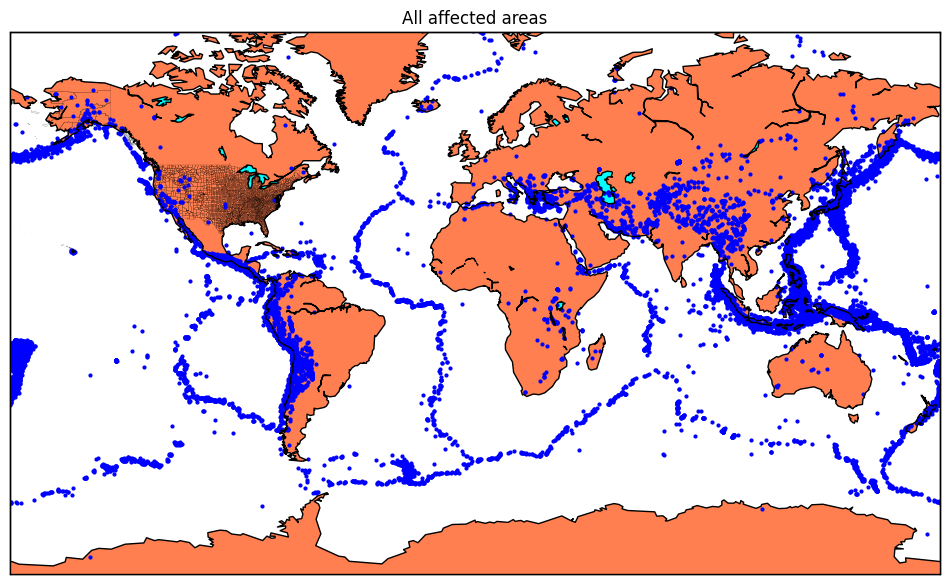

In [5]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize=2, color='blue')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcounties()
plt.show()

### Split the Dataset



Now, to create the earthquake prediction model, we need to divide the data into Xs and ys which respectively will be entered into the model as inputs to receive the output from the model.

Here the inputs are TImestamp, Latitude and Longitude and the outputs are Magnitude and Depth. I’m going to split the xs and ys into train and test with validation. The training set contains 80% and the test set contains 20%:

In [6]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 2)


### Neural Network for Earthquake Prediction

Now I will create a neural network to fit the data from the training set. Our neural network will consist of three dense layers each with 16, 16, 2 nodes and reread. Relu and softmax will be used as activation functions:

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='Adadelta', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/5
1873/1873 [==============================] - 7s 3ms/step - loss: 0.5038 - accuracy: 0.9182 - val_loss: 0.5038 - val_accuracy: 0.9242
Epoch 2/5
1873/1873 [==============================] - 5s 3ms/step - loss: 0.5038 - accuracy: 0.9182 - val_loss: 0.5038 - val_accuracy: 0.9242
Epoch 3/5
1873/1873 [==============================] - 5s 3ms/step - loss: 0.5038 - accuracy: 0.9182 - val_loss: 0.5038 - val_accuracy: 0.9242
Epoch 4/5
1873/1873 [==============================] - 5s 3ms/step - loss: 0.5038 - accuracy: 0.9182 - val_loss: 0.5038 - val_accuracy: 0.9242
Epoch 5/5
147/147 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.9242
Evaluation result on Test Data : Loss = 0.5038455724716187, accuracy = 0.9241777062416077


Source:

https://thecleverprogrammer.com/2020/11/12/earthquake-prediction-model-with-machine-learning/